In [63]:
import requests

url = "https://realtor.p.rapidapi.com/properties/list-for-rent"

querystring = {"state_code":"NY","city":"New York City","limit":"200","offset":"0","sort":"relevance"}

headers = {
    "X-RapidAPI-Key": "7c62f71be8msh61ccb7db7073854p1a9640jsnd13a2fbfc675",
    "X-RapidAPI-Host": "realtor.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

In [64]:
columns=['prop_type',
         'address_new',
         'price',
         'beds',
         'baths',
         'sqft',
         'rank',
         'source']

In [65]:
import numpy as np
import pandas as pd
data = response.json()
df = pd.DataFrame.from_dict(data['listings'])
df = df[columns]

In [66]:
pd.set_option('display.max_columns',50)

In [67]:
df.head()

,prop_type,address_new,price,beds,baths,sqft,rank,source
0,condop,"{'city': 'Staten Island', 'country': 'USA', 'c...",$1/mo,1,2,sq ft N/A,1,mls
1,apartment,"{'city': 'New York', 'country': 'USA', 'county...",$1+/mo,S-1,1-2,439+ sq ft,2,community
2,condop,"{'city': 'Staten Island', 'country': 'USA', 'c...",$1/mo,1,2,sq ft N/A,3,mls
3,condop,"{'city': 'Staten Island', 'country': 'USA', 'c...",$1/mo,1,2,sq ft N/A,4,mls
4,condop,"{'city': 'Staten Island', 'country': 'USA', 'c...",$1/mo,1,2,sq ft N/A,5,mls


In [68]:
df['prop_type'].value_counts()

condo             121
single_family      39
apartment          27
condop              5
townhome            3
multi_family        3
other               1
duplex_triplex      1
Name: prop_type, dtype: int64

In [69]:
import re
df['price'] = df['price'].apply(lambda x:re.sub("[^0-9]","",x))

#### Price = 1 is definitely a typo or a ridiculous mistake

In [70]:
df = df[df['price']!='1']

In [71]:
df['sqft'].value_counts()

sq ft N/A      122
650 sq ft        6
120 sq ft        4
N/A sq ft        4
107 sq ft        3
100 sq ft        3
200 sq ft        2
112 sq ft        2
500 sq ft        2
113 sq ft        2
800 sq ft        2
102 sq ft        2
414+ sq ft       1
121 sq ft        1
2,296 sq ft      1
101 sq ft        1
103 sq ft        1
106 sq ft        1
438+ sq ft       1
1,936 sq ft      1
850 sq ft        1
132 sq ft        1
110 sq ft        1
135 sq ft        1
208 sq ft        1
153 sq ft        1
889 sq ft        1
166 sq ft        1
123 sq ft        1
114 sq ft        1
315 sq ft        1
136 sq ft        1
155 sq ft        1
179 sq ft        1
900 sq ft        1
128 sq ft        1
104 sq ft        1
600 sq ft        1
126 sq ft        1
145 sq ft        1
550+ sq ft       1
178 sq ft        1
133 sq ft        1
175 sq ft        1
111 sq ft        1
1,521 sq ft      1
122 sq ft        1
700 sq ft        1
108 sq ft        1
680 sq ft        1
Name: sqft, dtype: int64

In [72]:
def na(x):
    if "N/A" in x: 
        return np.nan
    else:
        return re.sub('[^0-9]','',x)

In [73]:
df['sqft'] = df['sqft'].apply(na)

In [74]:
df['sqft'] = df['sqft'].astype(float)

In [75]:
df.isnull().sum()

prop_type        0
address_new      0
price            0
beds             0
baths            0
sqft           126
rank             0
source           0
dtype: int64

#### SQFT has 125 missing values

In [76]:
df['sqft'].median()

140.5

## Not Working

In [77]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
impute_knn.fit_transform(df)

ValueError: could not convert string to float: 'townhome'

In [78]:
df.reset_index(drop=True,inplace=True)

In [79]:
df['city']=None
# df['Country']=None
# df['State']=None
for i in range(0,len(df)):
    temp = df['address_new'][i]
    df['city'][i] = temp['city']
#     df['Country'][i] = temp['country']
#     df['State'][i] = temp['state']

C:\Users\Shubh\AppData\Local\Temp\ipykernel_7524\1675835345.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'][i] = temp['city']


In [80]:
df

,prop_type,address_new,price,beds,baths,sqft,rank,source,city
0,townhome,"{'city': 'Staten Island', 'country': 'USA', 'c...",101,2,3,121.0,9,mls,Staten Island
1,single_family,"{'city': 'Far Rockaway', 'country': 'USA', 'co...",150,S,Call,NaN,10,mls,Far Rockaway
2,single_family,"{'city': 'Brooklyn', 'country': 'USA', 'county...",800,1,1,NaN,11,unit_rental,Brooklyn
3,single_family,"{'city': 'South Ozone Park', 'country': 'USA',...",800,S,1,NaN,12,mls,South Ozone Park
4,townhome,"{'city': 'New York', 'country': 'USA', 'county...",850,1,1,179.0,13,unit_rental,New York
...,...,...,...,...,...,...,...,...,...
187,condo,"{'city': 'New York', 'country': 'USA', 'county...",1425,4,2,NaN,24,unit_rental,New York
188,condo,"{'city': 'New York', 'country': 'USA', 'county...",1425,4,2,NaN,25,unit_rental,New York
189,condo,"{'city': 'New York', 'country': 'USA', 'county...",1425,4,3,NaN,26,unit_rental,New York
190,condo,"{'city': 'New York', 'country': 'USA', 'county...",1430,5,3,NaN,27,unit_rental,New York


In [81]:
df.drop(columns='address_new',inplace=True)
df

,prop_type,price,beds,baths,sqft,rank,source,city
0,townhome,101,2,3,121.0,9,mls,Staten Island
1,single_family,150,S,Call,NaN,10,mls,Far Rockaway
2,single_family,800,1,1,NaN,11,unit_rental,Brooklyn
3,single_family,800,S,1,NaN,12,mls,South Ozone Park
4,townhome,850,1,1,179.0,13,unit_rental,New York
...,...,...,...,...,...,...,...,...
187,condo,1425,4,2,NaN,24,unit_rental,New York
188,condo,1425,4,2,NaN,25,unit_rental,New York
189,condo,1425,4,3,NaN,26,unit_rental,New York
190,condo,1430,5,3,NaN,27,unit_rental,New York


In [82]:
df.beds.value_counts()

4      78
1      33
3      24
S      19
5      15
6      14
2       6
S-2     2
S-3     1
Name: beds, dtype: int64

In [83]:
dele = df[(df['baths']=='0-2') | (df['baths']=='1-2') | (df['baths']=='Call') | (df['beds']=='S') | (df['beds']=='S-2') | (df['beds']=='S-3')].index

In [84]:
len(dele)

22

In [85]:
df.drop(dele,inplace=True)

In [86]:
df.reset_index(drop=True,inplace=True)

In [87]:
df

,prop_type,price,beds,baths,sqft,rank,source,city
0,townhome,101,2,3,121.0,9,mls,Staten Island
1,single_family,800,1,1,NaN,11,unit_rental,Brooklyn
2,townhome,850,1,1,179.0,13,unit_rental,New York
3,condo,875,4,1,NaN,14,unit_rental,New York
4,single_family,900,1,2,900.0,15,mls,Corona
...,...,...,...,...,...,...,...,...
165,condo,1425,4,2,NaN,24,unit_rental,New York
166,condo,1425,4,2,NaN,25,unit_rental,New York
167,condo,1425,4,3,NaN,26,unit_rental,New York
168,condo,1430,5,3,NaN,27,unit_rental,New York


In [88]:
df.to_csv('WithNanValues.csv')

In [89]:
data = df.drop(columns = 'rank')

In [90]:
data

,prop_type,price,beds,baths,sqft,source,city
0,townhome,101,2,3,121.0,mls,Staten Island
1,single_family,800,1,1,NaN,unit_rental,Brooklyn
2,townhome,850,1,1,179.0,unit_rental,New York
3,condo,875,4,1,NaN,unit_rental,New York
4,single_family,900,1,2,900.0,mls,Corona
...,...,...,...,...,...,...,...
165,condo,1425,4,2,NaN,unit_rental,New York
166,condo,1425,4,2,NaN,unit_rental,New York
167,condo,1425,4,3,NaN,unit_rental,New York
168,condo,1430,5,3,NaN,unit_rental,New York


In [91]:
data.isnull().sum()

prop_type      0
price          0
beds           0
baths          0
sqft         115
source         0
city           0
dtype: int64

In [92]:
171-56

115

In [93]:
X_train = data[~data['sqft'].isnull()].drop(columns='sqft')
y_train = data[~data['sqft'].isnull()]['sqft']

In [94]:
y_train

0       121.0
2       179.0
4       900.0
7       128.0
8       104.0
9       113.0
13      600.0
18      200.0
21      100.0
22      102.0
23      126.0
24      107.0
28      145.0
30      107.0
31      155.0
35      800.0
36      133.0
37      175.0
42      111.0
56      122.0
67      108.0
69      178.0
72      136.0
76      110.0
78      114.0
83      800.0
84      112.0
85      100.0
86      106.0
88      103.0
90      650.0
92      500.0
95      101.0
103     120.0
105     120.0
108     120.0
116     650.0
117     113.0
121     850.0
126     102.0
129     120.0
130     107.0
132     132.0
134    1936.0
137     135.0
139     100.0
141     650.0
143     650.0
144     208.0
147     153.0
148     889.0
152     166.0
158     123.0
161     680.0
162     112.0
Name: sqft, dtype: float64

In [95]:
X_train

,prop_type,price,beds,baths,source,city
0,townhome,101,2,3,mls,Staten Island
2,townhome,850,1,1,unit_rental,New York
4,single_family,900,1,2,mls,Corona
7,condo,900,4,1,unit_rental,New York
8,condo,925,4,2,unit_rental,New York
9,condo,925,3,1,unit_rental,New York
13,single_family,950,1,1,mls,Jamaica
18,single_family,1000,1,1,unit_rental,New York
21,condo,1025,4,1,unit_rental,New York
22,condo,1050,4,1,unit_rental,New York


In [96]:
X_test = data[data['sqft'].isnull()].drop(columns='sqft')

In [97]:
X_test

,prop_type,price,beds,baths,source,city
1,single_family,800,1,1,unit_rental,Brooklyn
3,condo,875,4,1,unit_rental,New York
5,single_family,900,1,1,unit_rental,Brooklyn
6,apartment,900,1,1,unit_rental,Bronx
10,apartment,945,1,1,unit_rental,Brooklyn
...,...,...,...,...,...,...
165,condo,1425,4,2,unit_rental,New York
166,condo,1425,4,2,unit_rental,New York
167,condo,1425,4,3,unit_rental,New York
168,condo,1430,5,3,unit_rental,New York


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression 

In [99]:
numeric_features = ['price', 'beds','baths']
categorical_features = ['prop_type', 'source','city']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the preprocessor and the linear regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['price', 'beds', 'baths']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['prop_type', 'source',
                                                   'city'])])),
                ('regressor', LinearRegression())])

In [100]:
y_pred = pipeline.predict(X_test)
y_pred

array([1104.11190705,   20.62308496, 1146.81553179,  562.15778246,
        694.69850741,  -10.06463634,  600.        ,  -10.06463634,
         63.3267097 ,  591.71364939,  709.30810568,   74.00261589,
        956.58190101,   65.38224942,  623.80377539,  653.77595423,
        106.03033445,  918.81529522,   86.73406179,  981.53073508,
        130.153229  ,  662.23703766,   75.34261315,   75.34261315,
        138.05805301,  140.82913518,  729.22283999,  733.49320247,
        148.73395919,   86.01851933,   86.01851933,  737.76356494,
        737.76356494,   96.69442552,   96.69442552,  159.40986538,
        878.67231863,  683.58885003,  803.59275051,  167.86345598,
        159.40986538,  655.11595149,  687.85921251,  692.12957498,
        170.08577156,  107.37033171,  107.37033171,  172.85685374,
        107.37033171,  137.34251055,   74.62707069,  148.01841673,
        148.01841673,  118.04623789,  150.78949891,  150.78949891,
        118.04623789,  148.01841673,  191.43758394,  191.43758

In [101]:
X_test.shape,y_pred.shape

((115, 6), (115,))

In [102]:
X_test['sqft']=y_pred
X_test

,prop_type,price,beds,baths,source,city,sqft
1,single_family,800,1,1,unit_rental,Brooklyn,1104.111907
3,condo,875,4,1,unit_rental,New York,20.623085
5,single_family,900,1,1,unit_rental,Brooklyn,1146.815532
6,apartment,900,1,1,unit_rental,Bronx,562.157782
10,apartment,945,1,1,unit_rental,Brooklyn,694.698507
...,...,...,...,...,...,...,...
165,condo,1425,4,2,unit_rental,New York,192.777581
166,condo,1425,4,2,unit_rental,New York,192.777581
167,condo,1425,4,3,unit_rental,New York,130.062141
168,condo,1430,5,3,unit_rental,New York,164.940584


In [103]:
X_train['sqft']=y_train
X_train

,prop_type,price,beds,baths,source,city,sqft
0,townhome,101,2,3,mls,Staten Island,121.0
2,townhome,850,1,1,unit_rental,New York,179.0
4,single_family,900,1,2,mls,Corona,900.0
7,condo,900,4,1,unit_rental,New York,128.0
8,condo,925,4,2,unit_rental,New York,104.0
9,condo,925,3,1,unit_rental,New York,113.0
13,single_family,950,1,1,mls,Jamaica,600.0
18,single_family,1000,1,1,unit_rental,New York,200.0
21,condo,1025,4,1,unit_rental,New York,100.0
22,condo,1050,4,1,unit_rental,New York,102.0


In [105]:
X_train.shape,X_test.shape

((55, 7), (115, 7))

In [118]:
import matplotlib.pyplot as plt

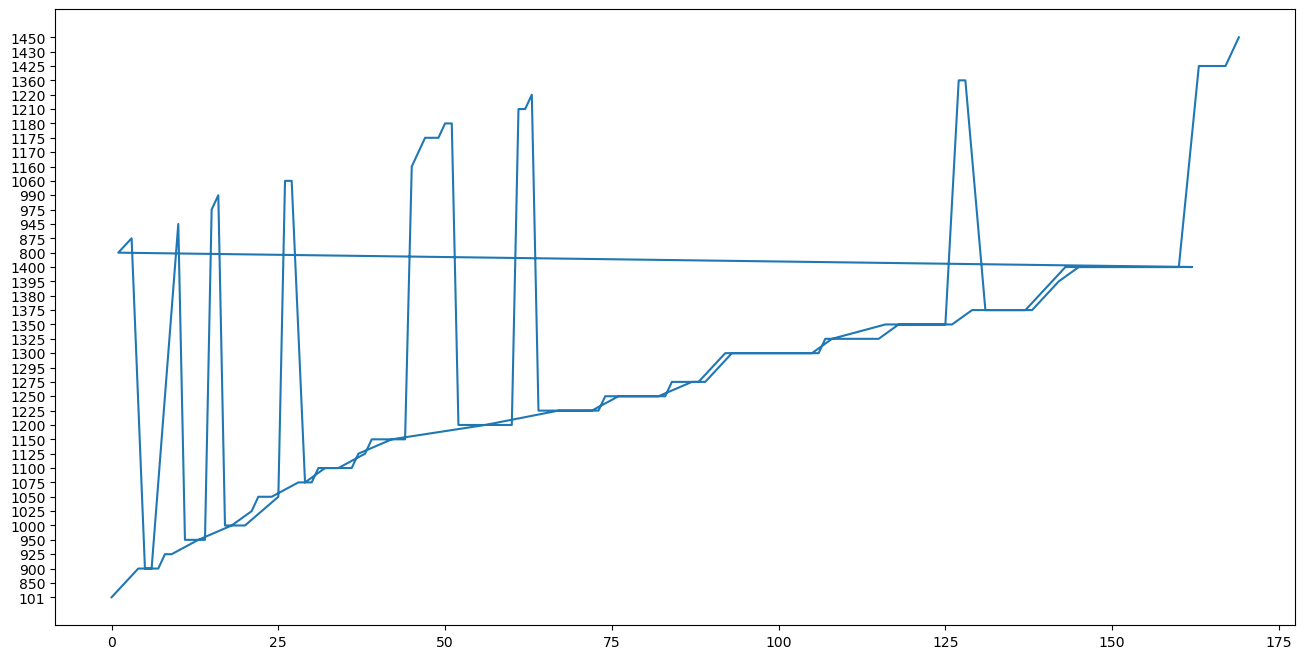

In [120]:
final_data = pd.concat([X_train,X_test])
final_data

plt.figure(figsize=(16,8))
plt.plot(final_data['price'])
plt.show()

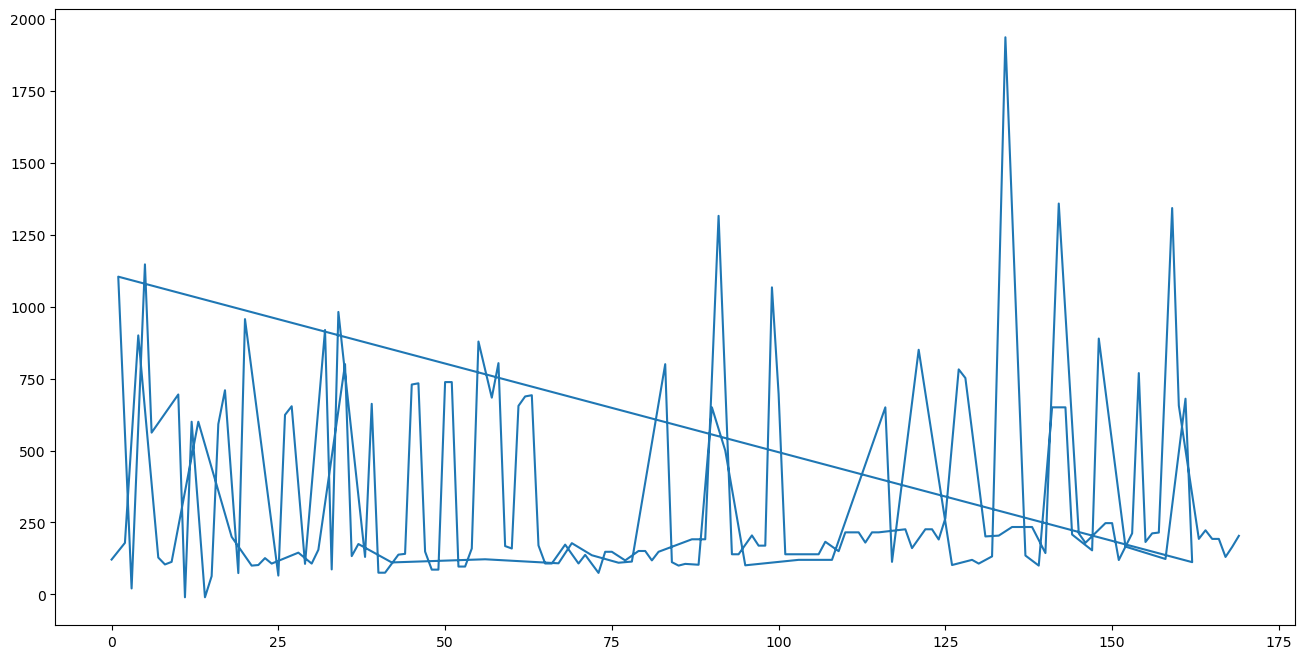

In [121]:
plt.figure(figsize=(16,8))
plt.plot(final_data['sqft'])
plt.show()

In [ ]:
final_data.to_csv('')